In [21]:
# 朴素贝叶斯是一种基于贝叶斯理论的有效监督学习算法，
# 之所以称之为”朴素“，是因为它是基于样本特征之间互相独立的”朴素”假设
# 正因如此，不需要考虑样本特征之间的关系，贝叶斯分类器的效率非常高

# 导入numpy
import numpy as np
# 将X，y赋值为np数组
X = np.array([[0, 1, 0, 1],
              [1, 1, 1, 0],
              [0, 1, 1, 0],
              [0, 0, 0, 1],
              [0, 1, 1, 0],
              [0, 1, 0, 1],
              [1, 0, 0, 1]])
y = np.array([0, 1, 1, 0, 1, 0, 0])
# 对不同分类计算每个特征为1的数量
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
# 打印计数结果
print("feature counts:\n{}".format(counts))


feature counts:
{0: array([1, 2, 0, 4]), 1: array([1, 3, 3, 0])}


In [22]:
# 导入伯努利贝叶斯
from sklearn.naive_bayes import BernoulliNB
# 使用伯努利贝叶斯拟合数据
clf = BernoulliNB()
clf.fit(X, y)
# 要进行预测的这一天，没有刮台风，也不闷热
# 但是多云，天气预报说没有雨
nextDay = [[0, 0, 1, 0]]
pre = clf.predict(nextDay)
if pre == [1]:
    print("rain!!")
else:
    print("no rain")

anotherDay = [[1, 1, 0, 1]]
pre2 = clf.predict(anotherDay)
if pre2 == [1]:    
    print("rain!!!")
else:
    print("no rain")
# 获取准确率
# nextday下雨的概率为86%
print("nextday probability:", clf.predict_proba(nextDay))
# anotherday不下雨的概率为92%
print("anotherday probability:", clf.predict_proba(anotherDay))


rain!!
no rain
nextday probability: [[0.13848881 0.86151119]]
anotherday probability: [[0.92340878 0.07659122]]


scores:0.544


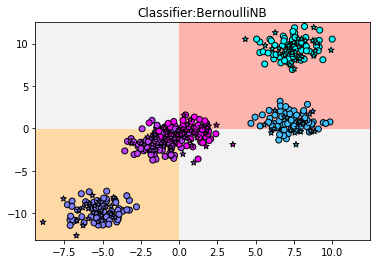

In [23]:
# 朴素贝叶斯有三种方法：
# ①伯努利朴素贝叶斯（Bernoulli Naive Bayes）
# ②高斯贝叶斯（Gaussian Naive Bayes）
# ③多项式贝叶斯（Multinomial Naive Bayes）

# 伯努利朴素贝叶斯，适合处理伯努利分布的数据集，即二项分布/0-1分布 如抛硬币

# 假如使用复杂的数据集
# 导入数据集生成工具
from sklearn.datasets import make_blobs
# 导入数据集分析工具
from sklearn.model_selection import train_test_split
# 生成样本数为500，分类数为5的数据集
X, y = make_blobs(n_samples=500, centers=5, random_state=8)
# 将数据集拆分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
# 使用伯努利朴素贝叶斯拟合数据
nb = BernoulliNB()
nb.fit(X_train, y_train)
print("scores:{:.3f}".format(nb.score(X_test, y_test)))
# 可以看到大约一半的数据没有被正确归类，接下来我们通过图像查看它的工作过程

# 导入画图工具
import matplotlib.pyplot as plt
# 限定横坐标和纵坐标的最大值
x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
# 使用不同背景色表示不同分类
xx, yy = np.meshgrid(np.arange(x_min, y_max, .02),
                     np.arange(y_min, y_max, .02))
z = nb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1)
# 将训练集和测试集用散点图表示
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.cool, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.cool, marker='*', edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:BernoulliNB")
plt.show()

# 可以看到分类图非常简单，就两条直线将5各类别分开。
# 这是因为伯努利朴素贝叶斯的默认参数二值化binarize = 0.0，
# 所以模型对于数据的判断是，如果特征1>=0，且特征2>=0，则数据点归为一类;
# 而特征1<0，且特征2<0，则归为一类
# 其余数据点归为第三类


Gaussian Score:0.968


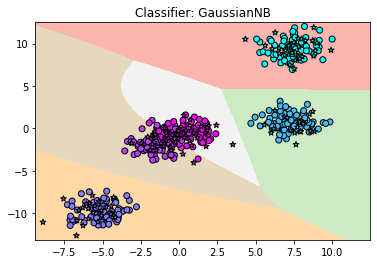

In [24]:
# 高斯朴素贝叶斯，是假设样本的特征符合高斯分布/正态分布所用的算法
# 导入高斯朴素贝叶斯
from sklearn.naive_bayes import GaussianNB
# 使用高斯朴素贝叶斯拟合数据
# 实例化
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Gaussian Score:{:.3f}".format(gnb.score(X_test, y_test)))
# 准确！

# 接下来使用图像的进行演示它的工作原理
# 用不同色块表示不同分类
z = gnb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1)
# 用散点图画出训练集和测试集数据
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.cool, edgecolors='k')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.cool, marker='*', edgecolors='k')

#设定横纵坐标轴范围
plt.xlim(xx.min(),yy.max())
plt.ylim(yy.min(),yy.max())
plt.title("Classifier: GaussianNB")
plt.show()
#高斯朴素贝叶斯拟合模型能处理大部分分类任务，这是因为在科学和社会领域，大量数据呈现正态分布的现象。

In [25]:
# 多项式朴素贝叶斯，主要处理多项式分布的数据集，如投骰子
# 导入多项式朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB
# 导入数据预处理工具MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# 使用MinMaxScaler对数据进行预处理，使数据全部为非负值
scaler = MinMaxScaler()# 将数据集中的特征值转化为0~1
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 使用多项式朴素贝叶斯拟合数据
# 实例化
mnb = MultinomialNB()
mnb.fit(X_train_scaled, y_train)# 输入的X数据必须为非负数
print("Multinomial score:{:.3f}".format(mnb.score(X_test_scaled, y_test)))
# 多项式朴素贝叶斯不适合用来处理这个数据集

Multinomial score:0.320


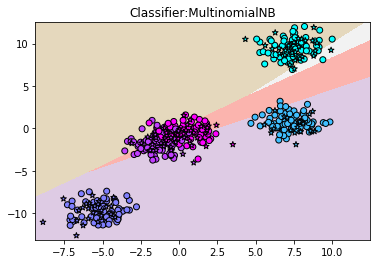

In [26]:
# 用图像的方法看多项式朴素贝叶斯是如何拟合数据的
# 用不同颜色区分数据
z = mnb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
# 用散点图表示数据集
plt.scatter(X_train[:,0], X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolors='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',edgecolors='k')
#设定范围
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Classifier:MultinomialNB")
plt.show()
# 可以看到很多点被错误地分类了

In [27]:
# 朴素贝叶斯实战——判断肿瘤是良性还是恶性
# 数据集来源于威斯康星乳腺肿瘤数据集
# 导入数据集
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("dataset keys：{}\n".format(cancer.keys()))
# 分别输出样本数据集的 特征数据 分类值 分类名称 数据描述 特征名称 文件名
# 打印数据集中的肿瘤分类
#print("Tumour Data:",cancer['data'])
#print("Tumour Target",cancer['target'])
print("Tumour Class:",cancer['target_names'],"\n")
#print("Tumour Description:",cancer['DESCR'])
print("Tumour Feather:",cancer['feature_names'],'\n')
#print("Tumour Filename:",cancer['filename'])

dataset keys：dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Tumour Class: ['malignant' 'benign'] 

Tumour Feather: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 



In [28]:
#使用高斯朴素贝叶斯进行建模
X, y = cancer.data, cancer.target
#拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)

# 使用高斯朴素贝叶斯进行拟合
gnb = GaussianNB()
gnb.fit(X, y)
print("train model score:{:.3f}".format(gnb.score(X_train, y_train)))
print("test model score:{:.3f}".format(gnb.score(X_test, y_test)))

X_train shape: (426, 30)
X_test shape: (143, 30)
train model score:0.944
test model score:0.937


In [29]:
#使用任意一个样本进行预测，然后输出它真实的分类进行对比
print('model predict class:{}'.format(gnb.predict([X[312]])))
print('model actual class:',y[312])

model predict class:[1]
model actual class: 1


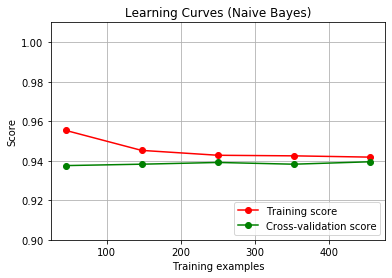

In [30]:
#高斯朴素贝叶斯的学习曲线，它指的是随着样本数的增加，模型得分的变化曲线。
#导入学习曲线库
from sklearn.model_selection import learning_curve
#导入随机拆分工具
from sklearn.model_selection import ShuffleSplit
#定义一个函数绘制学习曲线
def plot_learning_curve(estimator, title, X, y, 
                        ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    #设定横坐标标签
    plt.xlabel("Training examples")
    #设定纵坐标标签
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label="Cross-validation score")
    
    plt.legend(loc="lower right")
    return plt

#设定标题
title = "Learning Curves (Naive Bayes)"
#设定拆分数量，随机拆分
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#设定模型为高斯朴素贝叶斯
estimator = GaussianNB()
#调用我们定义好的函数
plot_learning_curve(estimator, title, X, y, ylim=(0.9, 1.01), cv=cv, n_jobs=4)
#显示图片
plt.show()

#从图像可以看到随着样本数的增加，模型的得分是越来越低的，这是因为随着数据的增加，模型的复杂度越来越高，相对难度也更大。
#而模型的交叉校验就没有什么变化。这说明高斯朴素贝叶斯在预测方面，对样本数量不敏感。